In [1]:
# Importation des modules et librairies nécessaires:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
import os

# Cas d'étude :

        Dans ce challenge, on traitera différents modèles de classification visant à prédire le niveau de satisfaction d'un passager d'avion à partir de de différentes données notamment des niveaux de satisfaction, type de vol, class du vol, etc . Le travail a consisté à effectuer un preprocessing complet incluant la gestion des valeurs manquantes, l’encodage, le scaling. Plusieurs modèles ont été testés, puis optimisés. Le modèle final, encapsulé dans une pipeline complète, permet désormais d’estimer avec précision le niveau de satisfaction d'un passager pour de nouvelles observations données.

In [2]:
df1=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")

df=pd.concat([df1,df2],ignore_index=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

## 1- Preprocessing de la données :

#### On commence par une analyse globale de notre data set afin de voir quelles opérations de cleaning seront necéssaires

In [3]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
# Suppression des 2 premières colonnes de notre data :

drop_col=df.columns[[0,1]]
df.drop(columns=drop_col,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

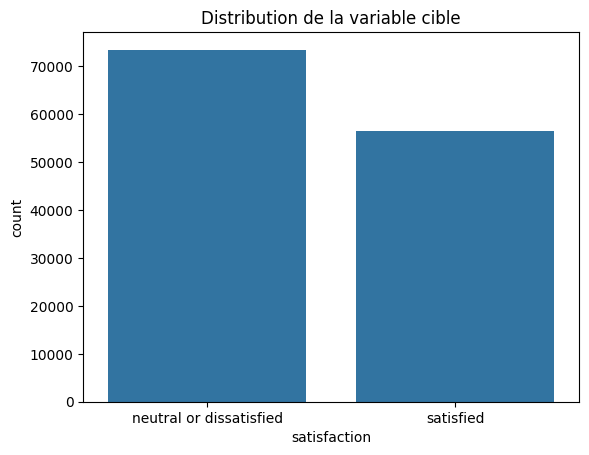

In [7]:
# Analyse de la distribution de notre variable cible :

sns.countplot(x=df['satisfaction'])
plt.title("Distribution de la variable cible")
plt.show()

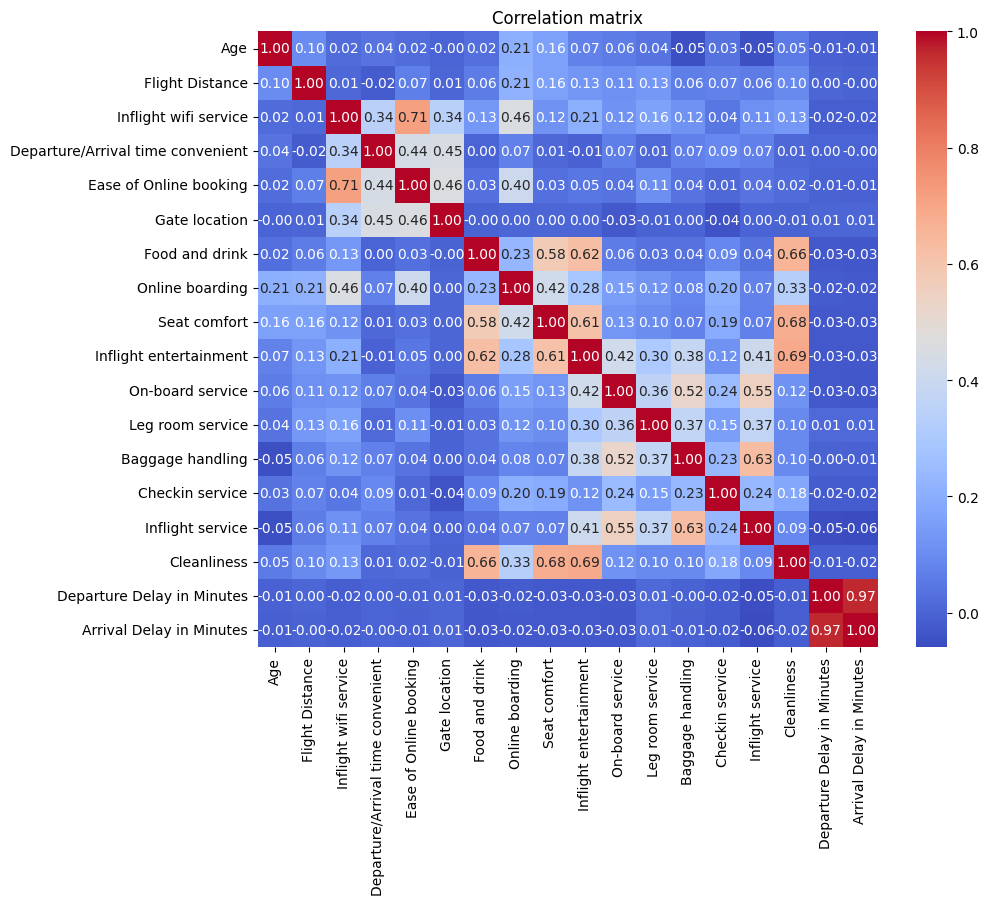

In [8]:
# Detection de possible multicolinéarité entre les variables numériques :

num_features=df.select_dtypes(include=np.number)
corr_mat=num_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation matrix") 
plt.show()

#### On remarque que les colonnes : "Arrival Delay in Minutes" et "Departure Delay in Minutes" sont fortement corrélées ( ce qui est logique!), on supprime donc l'une d'entre elles.

In [9]:
# Suppression de la colonne "Arrival Delay in Minutes" :

df.drop(columns=['Arrival Delay in Minutes'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             129880 non-null  object
 1   Customer Type                      129880 non-null  object
 2   Age                                129880 non-null  int64 
 3   Type of Travel                     129880 non-null  object
 4   Class                              129880 non-null  object
 5   Flight Distance                    129880 non-null  int64 
 6   Inflight wifi service              129880 non-null  int64 
 7   Departure/Arrival time convenient  129880 non-null  int64 
 8   Ease of Online booking             129880 non-null  int64 
 9   Gate location                      129880 non-null  int64 
 10  Food and drink                     129880 non-null  int64 
 11  Online boarding                    129880 non-null  

#### Une fois notre data nettoyée, on commence par la splitter en 2 sous ensembles (Train et Test set).

In [10]:
# Décomposition aléatoire (stratification sur la variable cible) de la data : 80 % pour l'entrainement du modèle et 20 % pour le test :

from sklearn.model_selection import train_test_split

X=df.drop(columns='satisfaction')
Y=df['satisfaction']

x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)
X_train=pd.DataFrame(x_train)
X_test=pd.DataFrame(x_test)


## 2- Evalution des différents modèles de classification :

In [11]:
# Création d'une pipeline pour le preprocessing des données, notamment pour la standardisation, l'imputation des valeurs manquantes
# et l'encodage es variables catégorielles :

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

num_features=X_train.select_dtypes(np.number).columns
col_ord=['Class']
ord_feature=X_train[col_ord].columns
col_ohe=['Customer Type','Gender','Type of Travel']
ohe_features=X_train[col_ohe].columns

num_pipe=Pipeline([

    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

preprocessor=ColumnTransformer([

    ('num',num_pipe,num_features),
    ('cat_ord',OrdinalEncoder(categories=[['Eco','Eco Plus','Business']]),ord_feature),
    ('cat_ohe',OneHotEncoder(),ohe_features)
])



In [12]:
# Création d'une pipeline pour un modèle de regression logistique :

full_pipeline_log=Pipeline([
    
    ('preporc', preprocessor),
    ('class', LogisticRegression(max_iter=5000))
])

full_pipeline_log.fit(X_train,y_train)
logistic_pred=full_pipeline_log.predict(X_test)


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logistic_pred))


                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.90      0.89     14690
              satisfied       0.87      0.83      0.85     11286

               accuracy                           0.87     25976
              macro avg       0.87      0.87      0.87     25976
           weighted avg       0.87      0.87      0.87     25976



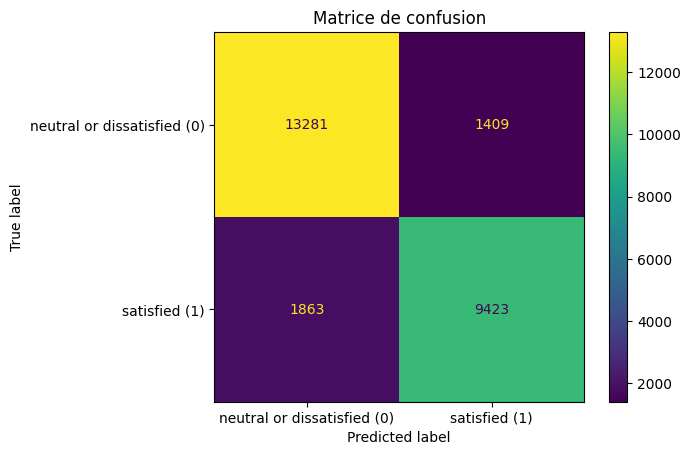

L'accuracy est de : 0.874037573144441
La précision est de : 0.8699224519940916
Le recall est de : 0.8349282296650717
Le F1 score est de : 0.8520661904331314
Le AUC score est de : 0.9269460093633359


In [14]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve)

# Evaluation du modèle de regression logistique à l'aide de métriques :

cm=confusion_matrix(y_test,logistic_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['neutral or dissatisfied (0)','satisfied (1)'])
disp.plot()
plt.title("Matrice de confusion")
plt.show()

logistic_proba=full_pipeline_log.predict_proba(X_test)[:,1]

acc=accuracy_score(y_test,logistic_pred)
prec=precision_score(y_test,logistic_pred,pos_label='satisfied')
recall=recall_score(y_test,logistic_pred,pos_label='satisfied')
f1=f1_score(y_test,logistic_pred,pos_label='satisfied')
roc_auc=roc_auc_score(y_test,logistic_proba)

print("L'accuracy est de :",acc)
print("La précision est de :",prec)
print("Le recall est de :",recall)
print("Le F1 score est de :",f1) 
print("Le AUC score est de :",roc_auc)


In [15]:
# Création d'une pipeline pour un modèle Linear SVC :

from sklearn.svm import LinearSVC
full_pipeline_SVC_lin=Pipeline([
    
    ('preporc', preprocessor),
    ('class', LinearSVC(random_state=42))
])

full_pipeline_SVC_lin.fit(X_train,y_train)
SVC_lin_pred=full_pipeline_SVC_lin.predict(X_test)

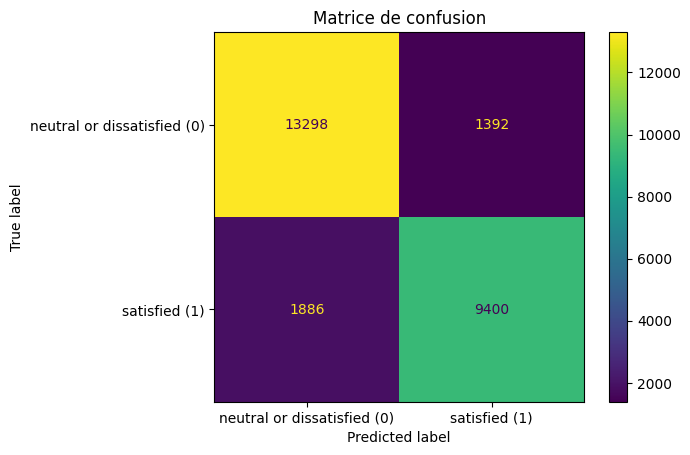

L'accuracy est de : 0.8738065906991068
La précision est de : 0.8710155670867309
Le recall est de : 0.8328903065745171
Le F1 score est de : 0.8515264063773893


In [16]:
# Evaluation du modèle Linear SVC à l'aide de métriques :

cm=confusion_matrix(y_test,SVC_lin_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['neutral or dissatisfied (0)','satisfied (1)'])
disp.plot()
plt.title("Matrice de confusion")
plt.show()


acc=accuracy_score(y_test,SVC_lin_pred)
prec=precision_score(y_test,SVC_lin_pred,pos_label='satisfied')
recall=recall_score(y_test,SVC_lin_pred,pos_label='satisfied')
f1=f1_score(y_test,SVC_lin_pred,pos_label='satisfied')

print("L'accuracy est de :",acc)
print("La précision est de :",prec)
print("Le recall est de :",recall)
print("Le F1 score est de :",f1) 


In [17]:
# Création d'une pipeline pour un modèle de Decision Tree classifier :

full_pipeline_Dec_tree=Pipeline([
    
    ('preporc', preprocessor),
    ('class', DecisionTreeClassifier(random_state=42))
])

full_pipeline_Dec_tree.fit(X_train,y_train)
Dec_tree_pred=full_pipeline_Dec_tree.predict(X_test)


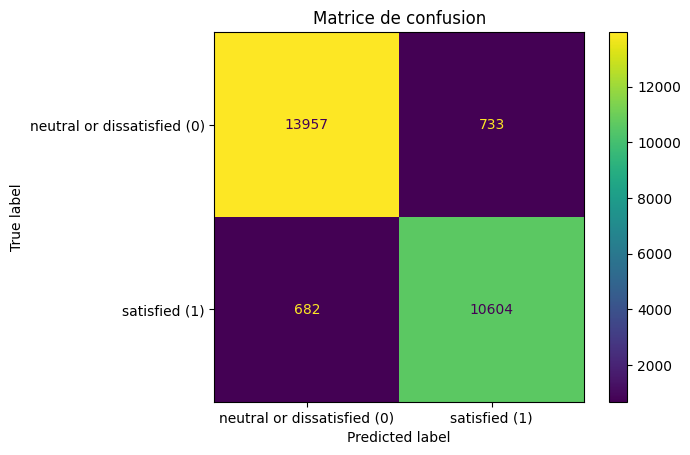

L'accuracy est de : 0.9455266399753619
La précision est de : 0.9353444473846697
Le recall est de : 0.9395711500974658
Le F1 score est de : 0.9374530345223887
Le AUC score est de : 0.9448366301882837


In [18]:
# Evaluation du modèle de Decision Tree classifier à l'aide de métriques :

cm=confusion_matrix(y_test,Dec_tree_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['neutral or dissatisfied (0)','satisfied (1)'])
disp.plot()
plt.title("Matrice de confusion")
plt.show()

Dec_tree_proba=full_pipeline_Dec_tree.predict_proba(X_test)[:,1]

acc=accuracy_score(y_test,Dec_tree_pred)
prec=precision_score(y_test,Dec_tree_pred,pos_label='satisfied')
recall=recall_score(y_test,Dec_tree_pred,pos_label='satisfied')
f1=f1_score(y_test,Dec_tree_pred,pos_label='satisfied')
roc_auc=roc_auc_score(y_test,Dec_tree_proba)

print("L'accuracy est de :",acc)
print("La précision est de :",prec)
print("Le recall est de :",recall)
print("Le F1 score est de :",f1) 
print("Le AUC score est de :",roc_auc)


In [19]:
# Création d'une pipeline pour un modèle SVC :

full_pipeline_SVC=Pipeline([
    
    ('preporc', preprocessor),
    ('class', SVC(random_state=42))
])

full_pipeline_SVC.fit(X_train,y_train)
SVC_pred=full_pipeline_SVC.predict(X_test)


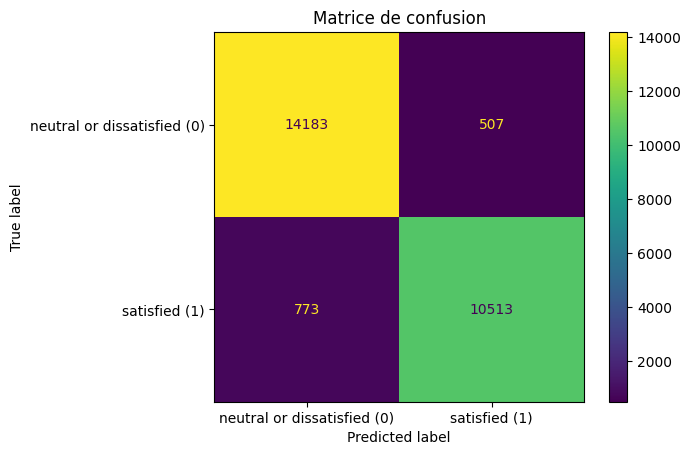

L'accuracy est de : 0.9507237449953804
La précision est de : 0.9539927404718693
Le recall est de : 0.9315080630870105
Le F1 score est de : 0.9426163364117278


In [20]:
# Evaluation du modèle SVC à l'aide de métriques :

cm=confusion_matrix(y_test,SVC_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['neutral or dissatisfied (0)','satisfied (1)'])
disp.plot()
plt.title("Matrice de confusion")
plt.show()

#SVC_proba=full_pipeline_SVC.predict_proba(X_test)[:,1]

acc=accuracy_score(y_test,SVC_pred)
prec=precision_score(y_test,SVC_pred,pos_label='satisfied')
recall=recall_score(y_test,SVC_pred,pos_label='satisfied')
f1=f1_score(y_test,SVC_pred,pos_label='satisfied')
#roc_auc=roc_auc_score(y_test,SVC_proba)

print("L'accuracy est de :",acc)
print("La précision est de :",prec)
print("Le recall est de :",recall)
print("Le F1 score est de :",f1) 
#print("Le AUC score est de :",roc_auc)


In [21]:
# Création d'une pipeline pour un modèle Random Forest Classifier :

full_pipeline_Rand_forest=Pipeline([
    
    ('preporc', preprocessor),
    ('class', RandomForestClassifier(random_state=42))
])

full_pipeline_Rand_forest.fit(X_train,y_train)
Rand_forest_pred=full_pipeline_Rand_forest.predict(X_test)


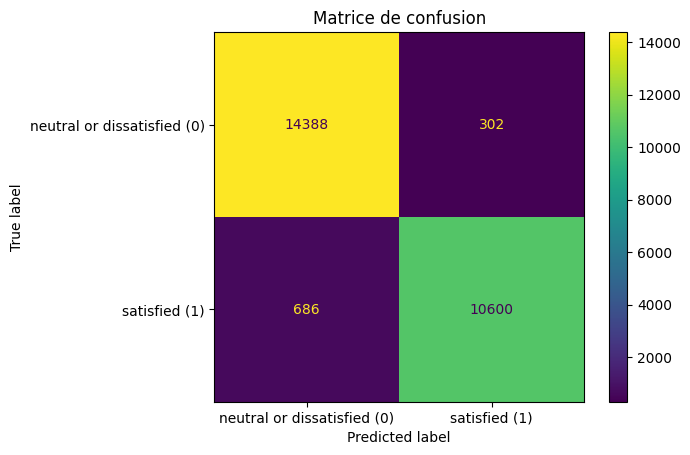

L'accuracy est de : 0.9619648906683093
La précision est de : 0.9722986607961842
Le recall est de : 0.939216728690413
Le F1 score est de : 0.9554714259960339
Le AUC score est de : 0.9937829804620675


In [22]:
# Evaluation du modèle Random Forest Classifier à l'aide de métriques :

cm=confusion_matrix(y_test,Rand_forest_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['neutral or dissatisfied (0)','satisfied (1)'])
disp.plot()
plt.title("Matrice de confusion")
plt.show()

Rand_forest_proba=full_pipeline_Rand_forest.predict_proba(X_test)[:,1]

acc=accuracy_score(y_test,Rand_forest_pred)
prec=precision_score(y_test,Rand_forest_pred,pos_label='satisfied')
recall=recall_score(y_test,Rand_forest_pred,pos_label='satisfied')
f1=f1_score(y_test,Rand_forest_pred,pos_label='satisfied')
roc_auc=roc_auc_score(y_test,Rand_forest_proba)

print("L'accuracy est de :",acc)
print("La précision est de :",prec)
print("Le recall est de :",recall)
print("Le F1 score est de :",f1) 
print("Le AUC score est de :",roc_auc)


A travers les résultats obtenus par les métriques de chaque modèle, on remarque que le modèle du Random forest est celui qui nous donne les meilleurs résultats.


### Remarque :
    Il est important de comparer les métriques obtenues sur le train set ainsi que sur le test set afin de détecter un éventuel overfitting ou underfitting du modele en question, c'est cequi va être appliqué en dessous.

In [23]:
# test d'un possible overfitting :

Rand_forest_train_pred=full_pipeline_Rand_forest.predict(X_train)
Rand_forest_train_proba=full_pipeline_Rand_forest.predict_proba(X_train)[:,1]
f1=f1_score(y_train,Rand_forest_train_pred,pos_label='satisfied')
roc_auc=roc_auc_score(y_train,Rand_forest_train_proba)
print("Le F1 score est de :",f1) 
print("Le AUC score est de :",roc_auc)


Le F1 score est de : 1.0
Le AUC score est de : 1.0


        On remarque que les resultats des métriques obtenus du train set sont parfaits (1) et que ceux du test set sont tres proche de 1, on peut potentiellement parler d'un très léger overfitting mais qui reste acceptable

### Cross validation :

In [24]:
# cross validation :

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv_=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

Rm_f1=cross_val_score(full_pipeline_Rand_forest,X,Y,scoring='f1_macro',cv=cv_,n_jobs=-1)
Rm_acc=cross_val_score(full_pipeline_Rand_forest,X,Y,scoring='accuracy',cv=cv_,n_jobs=-1)
Rm_prec=cross_val_score(full_pipeline_Rand_forest,X,Y,scoring='precision_macro',cv=cv_,n_jobs=-1)
Rm_recall=cross_val_score(full_pipeline_Rand_forest,X,Y,scoring='recall_macro',cv=cv_,n_jobs=-1)
Rm_AUC=cross_val_score(full_pipeline_Rand_forest,X,Y,scoring='roc_auc',cv=cv_,n_jobs=-1)

Rm_f1_score=np.mean(Rm_f1)
Rm_acc_score=np.mean(Rm_acc)
Rm_prec_score=np.mean(Rm_prec)
Rm_recall_score=np.mean(Rm_recall)
Rm_AUC_score=np.mean(Rm_AUC)

print("Mean accuracy est de :",Rm_acc_score)
print("Mean precision est de :",Rm_prec_score)
print("Mean recall est de :",Rm_recall_score)
print("Mean F1 score est :",Rm_f1_score )
print("Mean AUC score est :",Rm_AUC_score )

Mean accuracy est de : 0.9636356636895596
Mean precision est de : 0.9650443380561686
Mean recall est de : 0.9610808213015087
Mean F1 score est : 0.9628496866810726
Mean AUC score est : 0.9941046562540776


        On remarque que les résultats obtenus depuis la cross validation confirment que notre modèle Random forest classifier est un modele fiable et robuste, essayons maintenant de trouver les meilleures associations possibles des hyper paramètres de notre Random forest model en utilisant la méthode RandomizedSearchCV :

## 3- Fine-Tuning models :

In [25]:
# Fine-tuning on Random Forest model :

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Selection de quelques paramètres importants pour le Random Forest model :

param_grid=[{
    'class__n_estimators':[100,200,300,400,500],
    'class__criterion':['gini','entropy'],
    'class__max_depth':[None,5,10,20],
    'class__min_samples_split':[2,5,10],
    'class__min_samples_leaf':[1,2,5]
}]

# Fine-Tuning avec l'utilisation de RandomizedsearchCV :

grid_rand=RandomizedSearchCV(estimator=full_pipeline_Rand_forest,
param_distributions=param_grid,
n_iter=20,
scoring='f1_macro',
cv=cv_,
random_state=42,
verbose=2,
n_jobs=-1)

grid_rand.fit(X_train,y_train)
best_param=grid_rand.best_params_
best_score=grid_rand.best_score_

print("Les meilleurs paramètres sont :",best_param)
print("Le f1 score est :",best_score)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Les meilleurs paramètres sont : {'class__n_estimators': 400, 'class__min_samples_split': 5, 'class__min_samples_leaf': 2, 'class__max_depth': None, 'class__criterion': 'entropy'}
Le f1 score est : 0.9624362284941721


## 4- Evaluation du modèle sur data test :

In [26]:
final_model=grid_rand.best_estimator_
final_model

,steps,"[('preporc', ...), ('class', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat_ord', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


        Confirmons maintenant que notre modèle est bien réglé (sans overfitting ou underfitting) en comparant les métriques f1 score et AUC score entre le train set et le test set

In [27]:

Rand_forest_train_pred=final_model.predict(X_train)
Rand_forest_train_proba=final_model.predict_proba(X_train)[:,1]
f1=f1_score(y_train,Rand_forest_train_pred,pos_label='satisfied')
roc_auc=roc_auc_score(y_train,Rand_forest_train_proba)
print("Le F1 score est de :",f1) 
print("Le AUC score est de :",roc_auc)


Le F1 score est de : 0.9901184448261248
Le AUC score est de : 0.99984720584565


In [28]:

Rand_forest_train_pred=final_model.predict(x_test)
Rand_forest_train_proba=final_model.predict_proba(x_test)[:,1]
f1=f1_score(y_test,Rand_forest_train_pred,pos_label='satisfied')
roc_auc=roc_auc_score(y_test,Rand_forest_train_proba)
print("Le F1 score est de :",f1) 
print("Le AUC score est de :",roc_auc)


Le F1 score est de : 0.9558048384916881
Le AUC score est de : 0.9941362256918848


### Conclusion :

#### On remarque aussi dans ce cas que les métriques sont assez proches avec un excellent f1 score et AUC score, donc notre modèle est très bien réglé.

## 5- Prédiction d'instances à l'aide du modèle final :

        Après avoir construit notre modèle de classification final, place maintenant à l'étape ou l'objectif final de notre construction d'un modele de machine learning à savoir l'appliquer pour faire des prédictions de notre varibale cible. On prendra comme exemple d'instances un dataframe avec les différentes valeurs des features de notre data comme le montre l'exemple ci-dessous :

In [29]:
X_train.head().T

,56347,103345,75976,121763,107028
Gender,Male,Male,Female,Male,Female
Customer Type,Loyal Customer,Loyal Customer,Loyal Customer,disloyal Customer,Loyal Customer
Age,31,47,56,25,49
Type of Travel,Business travel,Personal Travel,Business travel,Business travel,Personal Travel
Class,Business,Eco,Eco,Business,Eco Plus
Flight Distance,448,189,436,562,2465
Inflight wifi service,5,3,5,2,0
Departure/Arrival time convenient,5,4,3,0,1
Ease of Online booking,5,3,3,2,0
Gate location,5,3,3,3,4


## Feature explication :

Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

In [30]:
Passager=X_train.iloc[[0]].copy()
Passager['Age']=21
Passager['Gender']='Female'
Passager['Class']='Eco Plus'
Passager['Flight Distance']=725
Passager['Departure/Arrival time convenient']=3
Passager['Departure Delay in Minutes']=41
Passager['Seat comfort']=3
Passager['Inflight wifi service']=1

Prédiction=final_model.predict(Passager)
print("Le niveau de satisfaction du passager est :",Prédiction)

Le niveau de satisfaction du passager est : ['satisfied']


## En plus :

        Essayons maintenant la méthode du voting classifier qui consiste à utiliser plusieurs modèles à la fois pour essayer de tirer le meilleur modele possible (pas tout le temps le cas) :

In [31]:
from sklearn.ensemble import VotingClassifier

voting_clf=VotingClassifier(
    estimators=[('log',full_pipeline_log),('lin_svc',full_pipeline_SVC_lin),('dc',full_pipeline_Dec_tree),('rm',full_pipeline_Rand_forest)],
    voting='hard',
    weights=[1,1,3,5],
    verbose=True,
    n_jobs=-1
)

voting_clf.fit(X_train,y_train)


,estimators,"[('log', ...), ('lin_svc', ...), ...]"
,voting,'hard'
,weights,"[1, 1, ...]"
,n_jobs,-1
,flatten_transform,True
,verbose,True
,transformers,"[('num', ...), ('cat_ord', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None


In [32]:

pipelines={
    "Logistic Regression": full_pipeline_log,
    "Linear SVC": full_pipeline_SVC_lin,
    "Decision Tree": full_pipeline_Dec_tree,
    "Random Forest": full_pipeline_Rand_forest,
    "Voting classifier": voting_clf
}

for name,clf in pipelines.items():
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(name,f1_score(y_test,y_pred,pos_label='satisfied'))

Logistic Regression 0.8520661904331314
Linear SVC 0.8515264063773893
Decision Tree 0.9374530345223887
Random Forest 0.9554714259960339
Voting classifier 0.9540968764146672


        On remarque que meme le modèle de voting classifier n'est pas supérieure en terme de précision au modèle Random forest et pour cause la forte robustesse de ce dernier qui rend le modèle voting classifier difficile à l'atteindre, en plus de contenir un modele comme Logistic regression ou bien le linear SVC qui eux sont un peu moins performants que les autres (même avec l'attribution de poids de ponderation pour les 4 modèles dans le but d'améliorer le voting classifier)

## Conclusion :
### On préferera le Random forest comme modèle final de notre cas d'étude !!!

## Feature importance :

### Méthode 1 :

Cette méthode se base sur la somme de la réduction de l'impurté.

Elle est utile pour une exploration rapide et une compréhension globale du modele

In [33]:

rf=final_model.named_steps['class']
preprocessor=final_model.named_steps['preporc']

feature_names=preprocessor.get_feature_names_out() #Extraction des noms des features
importances=rf.feature_importances_ #Importance de chaque feature

feat_impo=pd.DataFrame({
    'feature':feature_names,
    'importance':importances
})

feat_imp_sorted=feat_impo.sort_values(by='importance',ascending=False)
feat_imp_sorted.head(5)

,feature,importance
2,num__Inflight wifi service,0.161134
7,num__Online boarding,0.154786
17,cat_ord__Class,0.072896
22,cat_ohe__Type of Travel_Business travel,0.064556
23,cat_ohe__Type of Travel_Personal Travel,0.057396


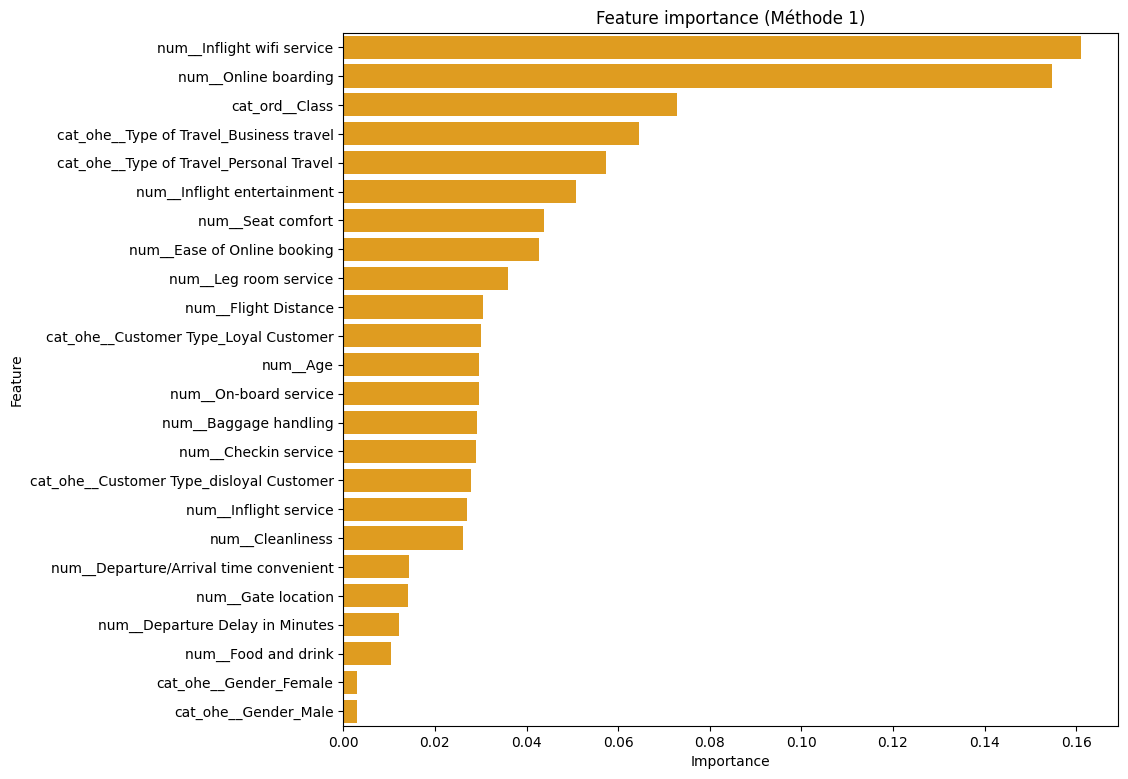

In [34]:
plt.figure(figsize=(10,9))
sns.barplot(data=feat_imp_sorted,x='importance',y='feature',order=feat_imp_sorted['feature'],color='orange')
plt.title("Feature importance (Méthode 1)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Méthode 2 :

Celle ci se base sur le principe de la perte réelle de performance, elle melange les valeurs une feature, ensuite elle mesure la chute de son scoring. Plus la chute est grande plus la feature est importante. 


Souvent utilisée par rapport à la premiere méthode pour son efficacité et son interprétaion directe.

In [35]:
from sklearn.inspection import permutation_importance

perm_imp=permutation_importance(
    final_model,
    X_test,
    y_test,
    scoring='f1_macro',
    random_state=42,
    n_jobs=-1,
    n_repeats=10
)

In [36]:
col_name=X_test.columns
imp=perm_imp.importances_mean

feat_imp=pd.DataFrame({
    'Feature':col_name,
    'Importance':imp
})

feat_impo_sorted=feat_imp.sort_values(by='Importance',ascending=False)


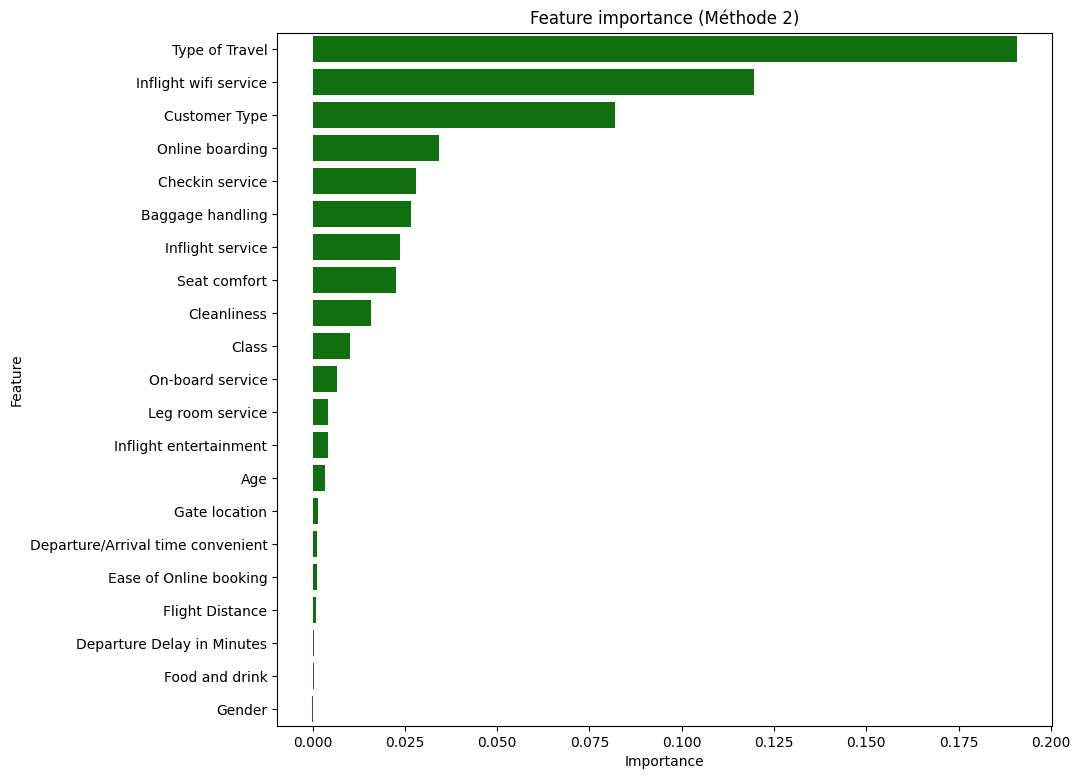

In [37]:
plt.figure(figsize=(10,9))
sns.barplot(data=feat_impo_sorted,x='Importance',y='Feature',order=feat_impo_sorted['Feature'],color='green')
plt.title("Feature importance (Méthode 2)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

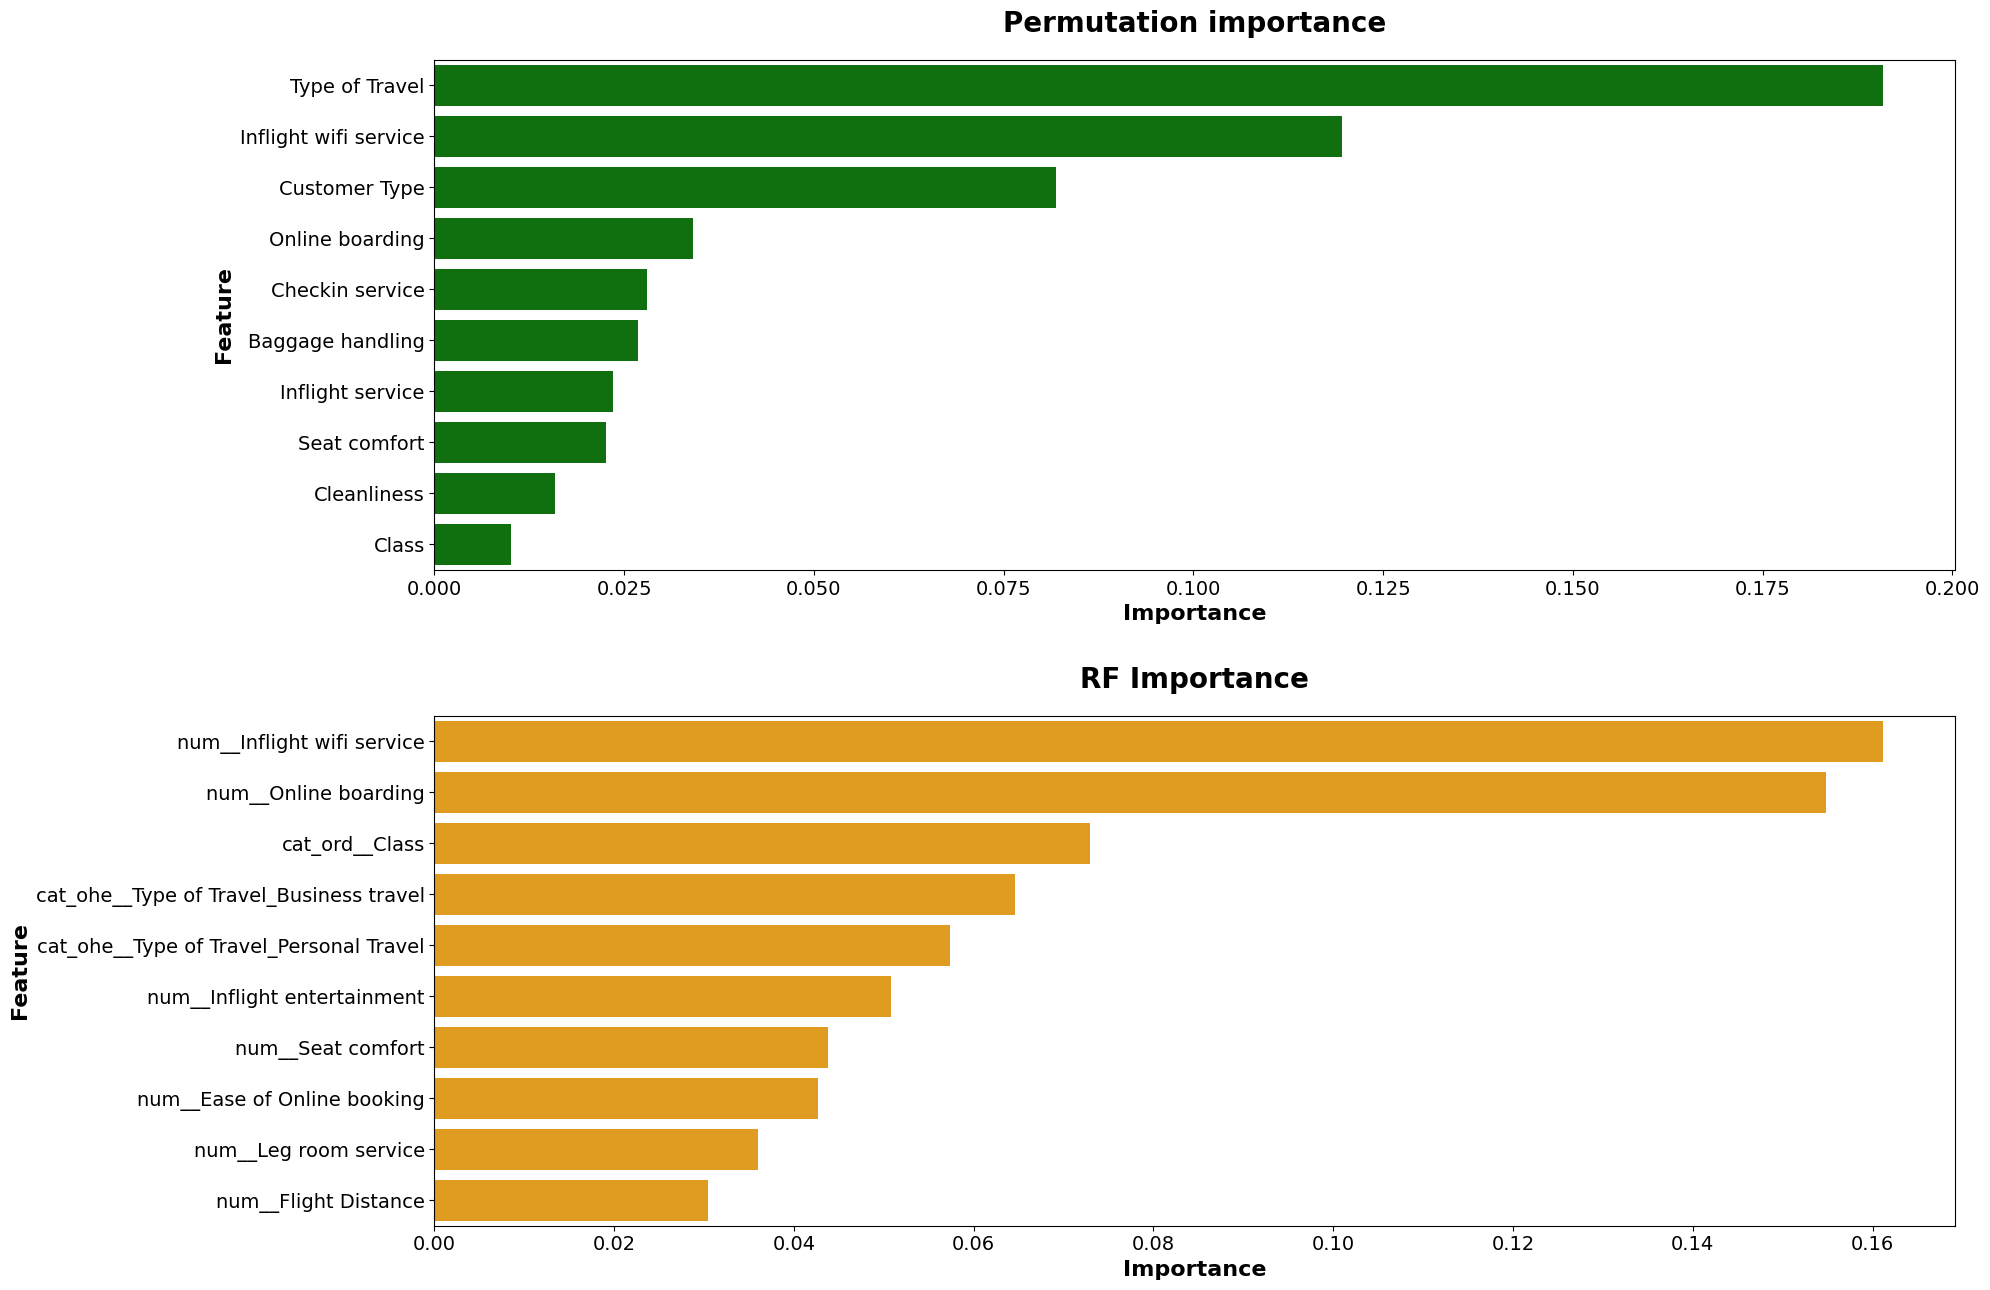

In [39]:

fig,axes=plt.subplots(2,1,figsize=(20,13))

sns.barplot(ax=axes[0],x='Importance',y='Feature',data=feat_impo_sorted.head(10),color='green')
axes[0].set_title("Permutation importance",fontweight='bold',fontsize=20,pad=20)
axes[0].set_xlabel("Importance", fontweight='bold', fontsize=16)
axes[0].set_ylabel("Feature", fontweight='bold', fontsize=16)
axes[0].tick_params(axis='both', labelsize=14)

sns.barplot(ax=axes[1],x='importance',y='feature',data=feat_imp_sorted.head(10),color='orange')
axes[1].set_title("RF Importance",fontweight='bold',fontsize=20,pad=20)
axes[1].set_xlabel("Importance", fontweight='bold', fontsize=16)
axes[1].set_ylabel("Feature", fontweight='bold', fontsize=16)
axes[1].tick_params(axis='both', labelsize=14)
plt.tight_layout(h_pad=3.0) 
plt.show()

# Conclusion :

On remarque depuis les 2 graphiques des deux méthodes des features importance que les variables les plus impactantes dans notre mon modèle sont principalment:

- Type of Travel

- Inflight wifi services
- Online boarding
- Customer type
- Class
- Seat comfort
- Checking sevice
- Baggage handling